Quora Kaggle Comp

In [6]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
train = pd.read_csv('./')
test = pd.read_csv('./data/test.csv')

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [7]:
train.shape

(404290, 6)

In [8]:
train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [9]:
train[train['is_duplicate'] == 1]

,id,qid1,qid2,question1,question2,is_duplicate
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
11,11,23,24,How do I read and find my YouTube comments?,How can I see all my Youtube comments?,1
12,12,25,26,What can make Physics easy to learn?,How can you make physics easy to learn?,1
13,13,27,28,What was your first sexual experience like?,What was your first sexual experience?,1
15,15,31,32,What would a Trump presidency mean for current...,How will a Trump presidency affect the student...,1
16,16,33,34,What does manipulation mean?,What does manipulation means?,1
18,18,37,38,Why are so many Quora users posting questions ...,Why do people ask Quora questions which can be...,1
20,20,41,42,Why do rockets look white?,Why are rockets and boosters painted white?,1
29,29,59,60,How should I prepare for CA final law?,How one should know that he/she completely pre...,1


In [11]:
train['is_duplicate'].mean()

0.369197853026293

In [18]:
all_qids = pd.Series(train['qid1'].tolist()+train['qid2'].tolist())

In [25]:
print('Number of pairs: {}'.format(train.shape[0]))
print('Number of question pairs with same meaning: {}'.format(round(train['is_duplicate'].mean(),4)))
print('Total number of questions: {}'.format(all_qids.unique().shape[0]))
print('Number of questions that appear multiple times: {}'.format(np.sum(all_qids.value_counts()>1)))

Number of pairs: 404290
Number of question pairs with same meaning: 0.3692
Total number of questions: 537933
Number of questions that appear multiple times: 111780


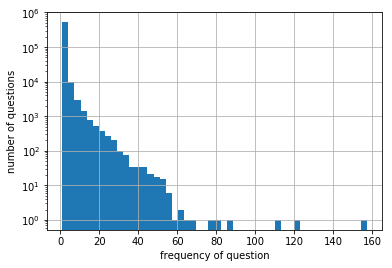

In [104]:
all_qids.value_counts().hist(bins=50)
plt.ylabel('number of questions')
plt.xlabel('frequency of question')
plt.yscale('log')

In [58]:
train['question1_len'] = train['question1'].apply(lambda x: len(str(x)))
train['question2_len'] = train['question2'].apply(lambda x: len(str(x)))

(0, 200)

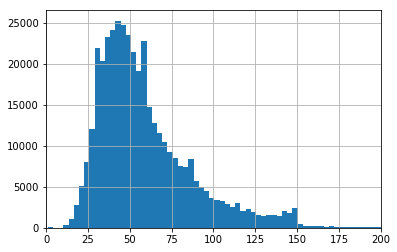

In [65]:
train['question1_len'].hist(bins=200)
plt.xlim(0,200)

(0, 200)

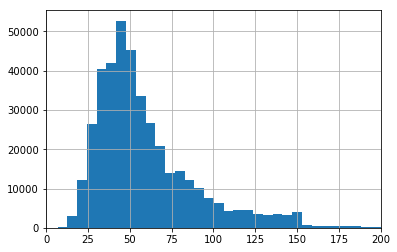

In [66]:
train['question2_len'].hist(bins=200)
plt.xlim(0,200)

(-100, 100)

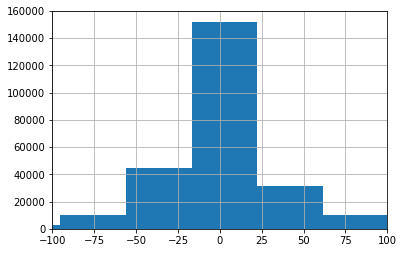

In [90]:
length_diff = train[train['is_duplicate'] == 0][['question1_len','question2_len']].diff(axis=1)
length_diff['question2_len'].hist(bins=40)
plt.xlim(-100,100)


(-100, 100)

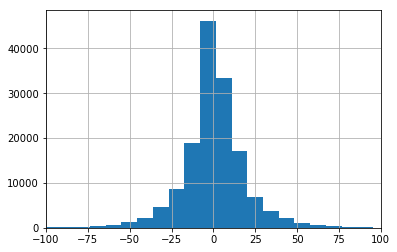

In [91]:
dup_length_diff = train[train['is_duplicate'] == 1][['question1_len','question2_len']].diff(axis=1)
dup_length_diff['question2_len'].hist(bins=40)
plt.xlim(-100,100)


In [2]:
train['question1'][0]

NameError: name 'train' is not defined

In [1]:
train['qid1'] == all_qids.unique()

NameError: name 'train' is not defined

In [96]:
from sklearn.feature_extraction.text import CountVectorizer

cvt = CountVectorizer(stop_words=stopwords,
        strip_accents='unicode', 
        ngram_range=(1,3),
        max_df=.84, #was. 84
        min_df=4, #was 4
        tokenizer=LemmaTokenizer())

tf_job = TfidfTransformer()

train_qs    =  cvt_job.fit_transform(train_qs)
X_job = tf_job.fit_transform(X_job_cvt)

NameError: name 'LemmaTokenizer' is not defined

In [ ]:
roc_auc_score(train['is_duplicate'])